**Lists and Dicts**

*Item 11 : How to slice sequences*



In [27]:
a = "a b c d e f g h".split()
print (a[3:5])
print (a[1:7])

## reverse
print ("reverse", a[::-1])

## copy
print (a[:])

## reverse
print ("explicit reverse", a[-1::-1])

# first three
print (a[:3])

# last three
print (a[-3:])

print (a[-3:-1])

## its a deep copy
b = a[3:5]
b[0] = 'x'
print (b, a)

## slice assignment
copy = a[:]
print ("orig", a)
a[2:4] = [10, 11, 12, 13, 16]
print ("adding 5 entries in the place of 2", a)
a = copy
print ("orig ", a)
a[2:7] = [9, 9]
print ("after copy of 2 elements into 5 spaces", a)

copy = a[:]
print ("are they ==", copy == a)
print ("are they the same", copy is not a)


['d', 'e']
['b', 'c', 'd', 'e', 'f', 'g']
reverse ['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
explicit reverse ['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']
['a', 'b', 'c']
['f', 'g', 'h']
['f', 'g']
['x', 'e'] ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
orig ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
adding 5 entries in the place of 2 ['a', 'b', 10, 11, 12, 13, 16, 'e', 'f', 'g', 'h']
orig  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
after copy of 2 elements into 5 spaces ['a', 'b', 9, 9, 'h']
are they == True
are they the same True


*Item 12 : Avoid Striding and Slicing in a single expression*


In [31]:
x = "red orange yellow green blue purple".split()
odds = x[::2]
evens= x[1::2]
print ("orig", x)
print ("odds", odds)
print ("evens", evens)

m = b'mangoose'
print (m[::-1])

## should be careful with strings, since reversing unicode can screw sequences up. 

orig ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
odds ['red', 'yellow', 'blue']
evens ['orange', 'green', 'purple']
esoognam


In [36]:
## palindrome

def isPal(s) :
    return (len(s) == 1) or ((s[0] == s[-1]) and isPal(s[1:-1]))

In [37]:
print (isPal("hello"))
print (isPal("x"))
print (isPal("malayalam"))

False
True
True


*Item 13 : Prefer catch-all unpacking over slicing*


In [44]:
car_ages = [0, 9, 4, 8, 7, 20, 19, 1, 6, 15]
ca_desc = sorted(car_ages, reverse=True)
oldest, sec_oldest = ca_desc[:2]
oldest, sec_oldest, *others = ca_desc
oldest, *middle, youngest = ca_desc
print (oldest, sec_oldest, others, middle, youngest)

20 19 [15, 9, 8, 7, 6, 4, 1, 0] [19, 15, 9, 8, 7, 6, 4, 1] 0


In [46]:
a = [1, 2]
small, *m, large = a
print (small, m, large)

1 [] 2


*Item 14 : Sort by complex criteria using the key parameter*


In [57]:
class Tool :
    def __init__(self, name, weight) :
        self.name = name
        self.weight = weight
    def __repr__(self) :
        return f"Tool({self.name}, {self.weight})"
    
tools = [
    Tool('level', 3.5),
    Tool('hammer', 1.25),
    Tool('screwdriver', 0.5),
    Tool('drill', 1.5),
    Tool('sander', 1.5),
    Tool('chisel', 0.25)
]

print (tools)

[Tool(level, 3.5), Tool(hammer, 1.25), Tool(screwdriver, 0.5), Tool(drill, 1.5), Tool(sander, 1.5), Tool(chisel, 0.25)]


In [58]:
print (sorted(tools, key=lambda x : x.name))


[Tool(chisel, 0.25), Tool(drill, 1.5), Tool(hammer, 1.25), Tool(level, 3.5), Tool(sander, 1.5), Tool(screwdriver, 0.5)]


In [59]:
print (sorted(tools, key=lambda x : x.weight))

[Tool(chisel, 0.25), Tool(screwdriver, 0.5), Tool(hammer, 1.25), Tool(drill, 1.5), Tool(sander, 1.5), Tool(level, 3.5)]


In [64]:
## To sort on multiple criteria, return a tuple

print (sorted(tools, key=lambda x : (x.weight, x.name)))
print (sorted(tools, key=lambda x : (x.name, x.weight)))

[Tool(chisel, 0.25), Tool(screwdriver, 0.5), Tool(hammer, 1.25), Tool(drill, 1.5), Tool(sander, 1.5), Tool(level, 3.5)]
[Tool(chisel, 0.25), Tool(drill, 1.5), Tool(hammer, 1.25), Tool(level, 3.5), Tool(sander, 1.5), Tool(screwdriver, 0.5)]



*Item 15: Be Cautious When Relying on dict Insertion ordering*


In [70]:
baby_names = {
    'cat' : 'kitten',
    'dog' : 'puppy'
}

In [10]:
print (baby_names.keys())
print (baby_names.values())
##print (baby_names.popitem())
print (baby_names.items())

dict_keys(['cat', 'dog'])
dict_values(['kitten', 'puppy'])
dict_items([('cat', 'kitten'), ('dog', 'puppy')])


In [8]:
 baby_names


{'cat': 'kitten'}

In [25]:
def my_func(*args, **kwargs) :
    for k, v in kwargs.items() :
        print (f"{k} -> {v}")
    for k in args :
        print (f"{k}")


In [28]:
my_func(98, name='shiva', salary=100)
my_func('foo', 4)

name -> shiva
salary -> 100
98
foo
4


In [29]:
class Person :
    def __init__(self, name, occupation) :
        self.name = name
        self.occupation = occupation


In [30]:
p = Person('shiva', 'engr')
## check out the __dict__ dict inside classes
for k, v in p.__dict__.items() :
    print (f"{k} -> {v}")

name -> shiva
occupation -> engr


In [35]:
def func(n : int) -> int :
    return n


In [36]:
func(3)


3

In [38]:
func('hello')

'hello'

*Item 16 : Prefer get Over in and KeyError to handle missing dictionary keys*

In [39]:
def incr1(d, k) :
    count = 0
    if k in d :
        count = d[k]
        count += 1
    d[k] = count

In [40]:
d = {}
incr1(d, 'foo')

In [44]:
incr1(d, 'foo')
incr1(d, 'bar')
d

{'foo': 3, 'bar': 1}

In [54]:
d={}

try :
    count = d['hello'] 
except KeyError :
    count = 23
d['hello'] = count
d

{'hello': 23}

In [59]:
d = {}
count = d.get('hello', 0) 
d['hello'] = count + 1
d

{'hello': 1}

In [57]:
from collections import defaultdict

d = defaultdict(list)
d['names'].append('shiva')
d

defaultdict(list, {'names': ['shiva']})


*Item 17: Prefer defaultdict over setdefault*
    


*Item18 : Know how to construct key-dependent default values with __missing__*



In [65]:
class MyFile(dict) :
    def __missing__(self, key) :
        try :
            handle = open(key, "rt")
            self[key] = handle
            return handle
        except :
            raise

In [66]:
f = MyFile()
print (f['foo'].read())


hello



In [69]:
print (f['bar'].read())

FileNotFoundError: [Errno 2] No such file or directory: 'bar'

In [72]:
baby_names.keys()

dict_keys(['cat', 'dog'])

In [73]:
baby_names?


In [81]:
def foo():
    for k, v in baby_names.items() :
        print (f"{k} -> {v}")

%timeit foo()


cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
c

dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
d

cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
c

cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
c

dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
d

dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
d

dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
d

cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
c

cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
c

dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
dog -> puppy
cat -> kitten
d

In [82]:
p = %pwd

In [83]:
print (p)



/Users/shivjaya/Code/pyth/effpyth


In [84]:
%matplotlib

Using matplotlib backend: MacOSX


In [85]:
%matplotlib inline

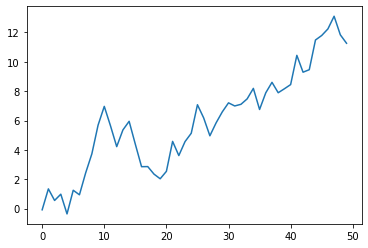

In [88]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.random.randn(50).cumsum())